In [76]:
# 도미 데이터 (35개)
bream_length = [25.4, 26.3, 26.5, 29.0, 29.0, 29.7, 29.7, 30.0, 30.0, 30.7,
                31.0, 31.0, 31.5, 32.0, 32.0, 32.0, 33.0, 33.0, 33.5, 33.5,
                34.0, 34.0, 34.5, 35.0, 35.0, 35.0, 35.0, 36.0, 36.0, 37.0,
                38.5, 38.5, 39.5, 41.0, 41.0]
bream_weight = [242.0, 290.0, 340.0, 363.0, 430.0, 450.0, 500.0, 390.0, 450.0,
                500.0, 475.0, 500.0, 500.0, 340.0, 600.0, 600.0, 700.0, 700.0,
                610.0, 650.0, 575.0, 685.0, 620.0, 680.0, 700.0, 725.0, 720.0,
                714.0, 850.0, 1000.0, 920.0, 955.0, 925.0, 975.0, 950.0]

In [77]:
# 빙어 데이터 (14개)
smelt_length = [9.8, 10.5, 10.6, 11.0, 11.2, 11.3, 11.8, 11.8, 12.0, 12.2,
                12.4, 13.0, 14.3, 15.0]
smelt_weight = [6.7, 7.5, 7.0, 9.7, 9.8, 8.7, 10.0, 9.9, 9.8, 12.2,
                13.4, 12.2, 19.7, 19.9]

In [78]:
import numpy as np

In [79]:
# 도미랑 빙어를 하나의 리스트로 합치자 (35개랑 14개)

fish_data = np.column_stack((bream_length+smelt_length,bream_weight+smelt_length))
fish_data

array([[  25.4,  242. ],
       [  26.3,  290. ],
       [  26.5,  340. ],
       [  29. ,  363. ],
       [  29. ,  430. ],
       [  29.7,  450. ],
       [  29.7,  500. ],
       [  30. ,  390. ],
       [  30. ,  450. ],
       [  30.7,  500. ],
       [  31. ,  475. ],
       [  31. ,  500. ],
       [  31.5,  500. ],
       [  32. ,  340. ],
       [  32. ,  600. ],
       [  32. ,  600. ],
       [  33. ,  700. ],
       [  33. ,  700. ],
       [  33.5,  610. ],
       [  33.5,  650. ],
       [  34. ,  575. ],
       [  34. ,  685. ],
       [  34.5,  620. ],
       [  35. ,  680. ],
       [  35. ,  700. ],
       [  35. ,  725. ],
       [  35. ,  720. ],
       [  36. ,  714. ],
       [  36. ,  850. ],
       [  37. , 1000. ],
       [  38.5,  920. ],
       [  38.5,  955. ],
       [  39.5,  925. ],
       [  41. ,  975. ],
       [  41. ,  950. ],
       [   9.8,    9.8],
       [  10.5,   10.5],
       [  10.6,   10.6],
       [  11. ,   11. ],
       [  11.2,   11.2],


In [80]:
# 0 : 빙어, 1: 도미
fish_target = np.concatenate((np.ones(35), np.zeros(14)))
fish_target

array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.])

In [81]:
import matplotlib.pyplot as plt

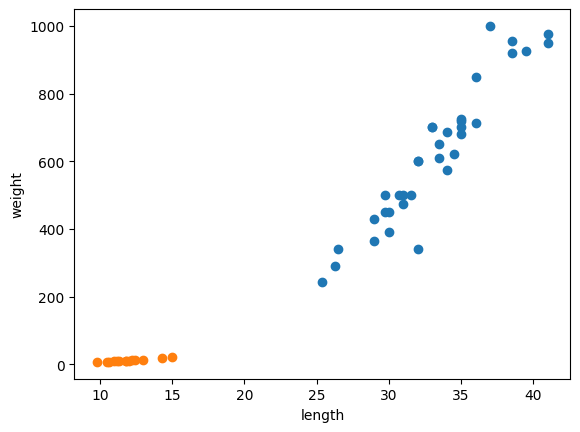

In [82]:
plt.scatter(bream_length, bream_weight)
plt.scatter(smelt_length, smelt_weight)

plt.xlabel("length")
plt.ylabel("weight")
plt.show()

In [83]:
# 1. 데이터 준비
x = fish_data
y = fish_target

In [84]:
# 2. 데이터 분할

from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=1)

In [85]:
# 3. 모델 선택
# K Nearest Neighbors : k만큼 가까운 이웃들

from sklearn.neighbors import KNeighborsClassifier

In [86]:
model = KNeighborsClassifier(n_neighbors=28)

In [87]:
model.fit(x_train, y_train)

KNeighborsClassifier(n_neighbors=28)

In [88]:
model.score(x_test, y_test)

0.6

In [89]:
# 길이가 20cm, 무게 150인 물고기는 도미? 빙어?
# 가까운 것들 중에 많은 걸 따라감

model.predict([[20, 150]])

array([1.])

k nearest neighbors (knn)

- k 개의 인접한 데이터들 중 더 많은 데이터 클래스를 따라감

- k는 보통 홀수 (동점을 막기 위해서)

In [90]:
dist, idx = model.kneighbors([[20, 150]])

# [20, 150]랑 가장 가까운 5개 (5개의 점)
# [92.158342 135.81965984 137.17871555 138.02057818 138.23168957]
# 가장 가까운 데이터 5개를 찾았을 때 : 4개는 0이고 1개만 1이니까 이것도 0으로 판단

print(dist)
print(x_train[idx])
print(y_train[idx])
      

[[ 92.158342   135.81965984 137.17871555 138.02057818 138.23168957
  138.44305689 138.97258722 139.71657024 139.82310253 140.14167831
  190.37857022 240.20824299 280.14460552 300.1567757  300.1666204
  325.18610056 350.13438849 350.16351895 350.17281448 350.18887761
  425.23052572 450.15997157 450.15997157 460.19805519 470.22361702
  530.21222166 550.15361491 550.15361491]]
[[[ 25.4 242. ]
  [ 14.3  14.3]
  [ 13.   13. ]
  [ 12.2  12.2]
  [ 12.   12. ]
  [ 11.8  11.8]
  [ 11.3  11.3]
  [ 10.6  10.6]
  [ 10.5  10.5]
  [ 26.3 290. ]
  [ 32.  340. ]
  [ 30.  390. ]
  [ 29.  430. ]
  [ 29.7 450. ]
  [ 30.  450. ]
  [ 31.  475. ]
  [ 29.7 500. ]
  [ 30.7 500. ]
  [ 31.  500. ]
  [ 31.5 500. ]
  [ 34.  575. ]
  [ 32.  600. ]
  [ 32.  600. ]
  [ 33.5 610. ]
  [ 34.5 620. ]
  [ 35.  680. ]
  [ 33.  700. ]
  [ 33.  700. ]]]
[[1. 0. 0. 0. 0. 0. 0. 0. 0. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
  1. 1. 1. 1.]]


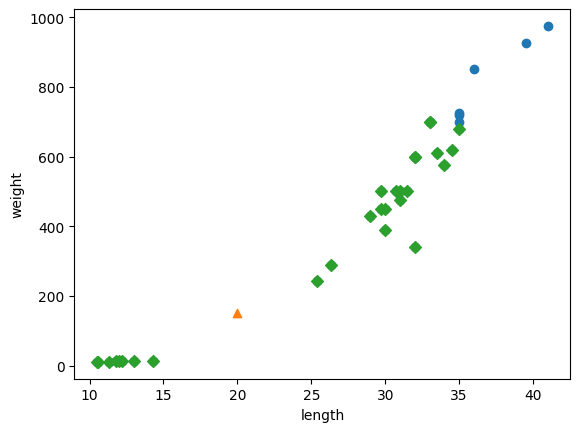

In [91]:
# 전체 데이터
plt.scatter(x_train[:, 0], x_train[:, 1])

# 지금 예측하고 싶은 값
plt.scatter(20, 150, marker="^")

# 이웃한 점들
plt.scatter(x_train[idx, 0], x_train[idx, 1], marker="D")

plt.xlabel("length")
plt.ylabel("weight")
plt.show()